# Risk Analysis: Analysing Loan Approval

## Author: Gboyega Adenaike
###        Data Analysis |Finance Analyst |Business Analyst |Data Visualisation Expert
## Tutor: Aritri Debnath
## Date:  23rd February, 2025

## ________________________________________________________________________________________________________

### Project Decription

This Project aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study. 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment. 

## ________________________________________________________________________________________________________

#### Importing the Libraries required for EDA

In [2]:
#importing the required libraries.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import math
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,r2_score

get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

The set_options helps to display the maximum columns i wilke to display

#### 1. Reading the input Datasets from File

In [5]:
#Reading the current application_data in pandas
application_file_location = "application_data.csv"
app_df = pd.read_csv(application_file_location)
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# importing & reading previous_application in pandas
previous_file_location = "previous_application.csv"
Prev_df = pd.read_csv(previous_file_location)
Prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Understanding the Sturcture of the Datasets

In [7]:
# Getting the Dataframe dimensions
app_df.shape

(307511, 122)

In [8]:
Prev_df.shape

(1670214, 37)

As we can see that in the application dataset we have 307,511 numbers of rows and 122 features or columns while we have 1670214 numbers of rows and 37 features or columns 

In [9]:
# Getting the Columns information for application datasets
app_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [10]:
# Getting the Columns information for Previous application datasets
Prev_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [11]:
# Getting the Basic information of the application datasets
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


The information of the application datasets for the loan shows that we have SK_ID_CURR column as the first one and having AMT_REQ_CREDIT_BUREAU_YEAR as the last columns while we have 65 cloumns as float, 41 columns as intergers and 16 columns as object type of datasets

In [12]:
# Getting the Basic information of the Previous application datasets
Prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

The information of the previous application datasets for the loan shows that we have  SK_ID_PREV  column as the first one and having NFLAG_INSURED_ON_APPROVAL as the last columns while we have 15 cloumns as float, 6 columns as intergers and 16 columns as object type of datasets with the count of redords having non-null in the columns.

In [13]:
# Getting the descriptive statistics analysis for application datasets
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [14]:
# Getting the descriptive statistics analysis for Previous application datasets
Prev_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


The statistics for both datasets express the count, mean which is the average, standard deviation, minimum and maximum and the 25, 50 and 75 percentile of the columns. in the application datasets we could see that we can also identify outliers from the descriptive analysis as we can see that a count of 19 children is an indicator of a outliers in the datasets which we need to treat as well.

### 3. Data Quality Assessment and Handling Missing Values

##### 3.1 checking of the percentage of missing values for columns and rows

In [17]:
# checking column wise null percentages
col_app = pd.DataFrame(app_df.isnull().mean().round(4) * 100,
                    columns = ['Percentage_missing_value']).sort_values(by=['Percentage_missing_value'])
print(col_app)

                              Percentage_missing_value
SK_ID_CURR                                        0.00
HOUR_APPR_PROCESS_START                           0.00
REG_REGION_NOT_WORK_REGION                        0.00
LIVE_REGION_NOT_WORK_REGION                       0.00
REG_CITY_NOT_LIVE_CITY                            0.00
REG_CITY_NOT_WORK_CITY                            0.00
LIVE_CITY_NOT_WORK_CITY                           0.00
ORGANIZATION_TYPE                                 0.00
FLAG_DOCUMENT_21                                  0.00
FLAG_DOCUMENT_20                                  0.00
FLAG_DOCUMENT_19                                  0.00
FLAG_DOCUMENT_18                                  0.00
FLAG_DOCUMENT_17                                  0.00
FLAG_DOCUMENT_16                                  0.00
WEEKDAY_APPR_PROCESS_START                        0.00
FLAG_DOCUMENT_15                                  0.00
FLAG_DOCUMENT_13                                  0.00
FLAG_DOCUM

In [18]:
# checking column wise null percentages
col_Prev = pd.DataFrame(Prev_df.isnull().mean().round(4) * 100,
                    columns = ['Percentage_missing_value']).sort_values(by=['Percentage_missing_value'])
print(col_Prev)

                             Percentage_missing_value
SK_ID_PREV                                       0.00
NAME_YIELD_GROUP                                 0.00
NAME_SELLER_INDUSTRY                             0.00
SELLERPLACE_AREA                                 0.00
CHANNEL_TYPE                                     0.00
NAME_PRODUCT_TYPE                                0.00
NAME_PORTFOLIO                                   0.00
NAME_GOODS_CATEGORY                              0.00
NAME_CLIENT_TYPE                                 0.00
CODE_REJECT_REASON                               0.00
DAYS_DECISION                                    0.00
NAME_CONTRACT_STATUS                             0.00
NAME_CASH_LOAN_PURPOSE                           0.00
NAME_PAYMENT_TYPE                                0.00
AMT_APPLICATION                                  0.00
NFLAG_LAST_APPL_IN_DAY                           0.00
FLAG_LAST_APPL_PER_CONTRACT                      0.00
HOUR_APPR_PROCESS_START     

In [21]:
# summary of missing values associated with columns
print(str(round(100.0 * col_app[col_app['Percentage_missing_value']==0].count()/len(col_app),2))+"%" + "Columns have no missing value")
print(str(round(100.0 * col_app[(col_app['Percentage_missing_value']>0)&(col_app['Percentage_missing_value']<=10)].count()/len(col_app),2))+"%" + "Columns have missing value between 0 - 10%") 
print(str(round(100.0 * col_app[(col_app['Percentage_missing_value']>10)&(col_app['Percentage_missing_value']<=50)].count()/len(col_app),2))+"%" + "Columns have missing value between 10-50%") 
print(str(round(100.0 * col_app[col_app['Percentage_missing_value']>50].count()/len(col_app),2))+"%" + "Columns have more than 50% missing value")

Percentage_missing_value    47.54
dtype: float64%Columns have no missing value
Percentage_missing_value    5.74
dtype: float64%Columns have missing value between 0 - 10%
Percentage_missing_value    13.11
dtype: float64%Columns have missing value between 10-50%
Percentage_missing_value    33.61
dtype: float64%Columns have more than 50% missing value


The summary of the missing values associated with the columns using the code above highligts the percentage of columns with missing values, we can see that 47.54% of the columns for the application data has no missing values, 5.74 have missing values between 0 to 10%, 13.11% have missing values between 10 to 50% while 33.61% of the columns have missing values more than 50%.

In [26]:
# checking row wise missing values
row_null = pd.DataFrame(app_df.isnull().sum(axis=1),
                    columns = ['Number_missing_value'])
print(row_null)

        Number_missing_value
0                          1
1                          2
2                         48
3                         56
4                         50
...                      ...
307506                     8
307507                    10
307508                     4
307509                    30
307510                    17

[307511 rows x 1 columns]


##### 3.2 Removing the columns with high percentage of missing values (>50%)

In [27]:
# Droping column having more than 50% null values
current_app_df = app_df.drop(app_df.columns[app_df.apply(lambda col_app: (col_app.isnull().sum()/len(app_df)*100) > 50)], axis=1)
print (current_app_df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [28]:
#checking the dimension of dataframe after droping columns
current_app_df.shape

(307511, 81)

In [30]:
#Re- checking columns with missing values
round(100.0*current_app_df.isnull().sum()/len(current_app_df), 2).sort_values()

SK_ID_CURR                       0.00
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_LIVE_REGION       0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
FLAG_DOCUMENT_19                 0.00
FLAG_DOCUMENT_18                 0.00
FLAG_DOCUMENT_17                 0.00
REGION_RATING_CLIENT_W_CITY      0.00
FLAG_DOCUMENT_16                 0.00
FLAG_DOCUMENT_14                 0.00
FLAG_DOCUMENT_13                 0.00
FLAG_DOCUMENT_12                 0.00
FLAG_DOCUMENT_11                 0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_6                  0.00
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMENT_2                  0.00
FLAG_DOCUMEN

##### 3.3 Understanding the best technique for columns with 13% missing values

##### The target columns for this analysis will be:








AMT_REQ_CREDIT_BUREAU_MON   
AMT_REQ_CREDIT_BUREAU_WEEK  
AMT_REQ_CREDIT_BUREAU_DAY   
AMT_REQ_CREDIT_BUREAU_HOUR  
AMT_REQ_CREDIT_BUREAU_QRT    
AMT_REQ_CREDIT_BUREAU_YEAR    

In [31]:
columns_on_focus = ['AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
current_app_df[columns_on_focus].dtypes

AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

All the focus coulmns have the same data types which is float type. we would now look further in each column to chack the data type.

##### 3.3.1 To get the best inputation technique for AMT_REQ_CREDIT_BUREAU_MON 

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_MON'>

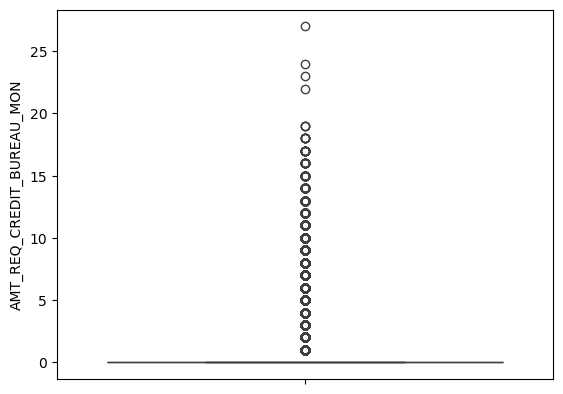

In [33]:
sns.boxplot(current_app_df['AMT_REQ_CREDIT_BUREAU_MON'])

The boxplot is not looking clear as we can see that their are presence of outliers in the column so further assessment will be done

In [ ]:
#understanding various records in the column AMT_REQ_CREDIT_BUREAU_MON
current_app_df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

Majority of the columns has 0 as values

In [35]:
#Number of missing values in MT_REQ_CREDIT_BUREAU_MON
current_app_df['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

41519

In [36]:
#Calculating percentage of each record in the dataframe
current_app_df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_MON
0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
23.0     0.000376
27.0     0.000376
22.0     0.000376
Name: proportion, dtype: float64

In [37]:
#Checking the sytatistics of the column
current_app_df['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

The summary above shows there are only few records with value grwater than 0. it expplains the reason behind distorted boxplot.

For the column AMT_REQ_CREDIT_BUREAU_MON, we can either exclude the missing value or fill in 0 to the columns since 83% of the rows are 0. 

The best imputation technique is to replace null with with the mode which is 0.

##### 3.3.2 To get the best inputation technique for AMT_REQ_CREDIT_BUREAU_WEEK

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_WEEK'>

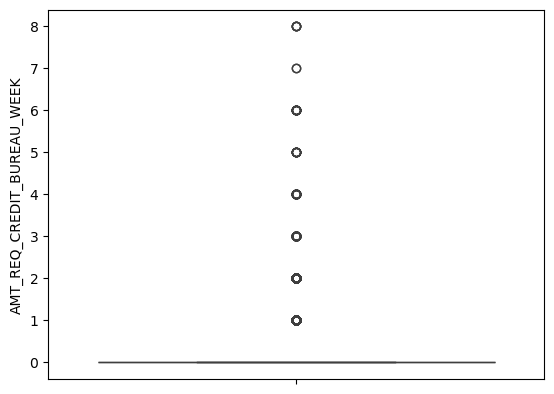

In [38]:
sns.boxplot(current_app_df['AMT_REQ_CREDIT_BUREAU_WEEK'])

The boxplot is not looking clear as we can see that their are presence of outliers in the column so further assessment will be done

In [39]:
#understanding various records in the column AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

Majority of the columns as 0 as values

In [40]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

41519

In [41]:
#Calculating percentage of each record in the dataframe
current_app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: proportion, dtype: float64

In [42]:
#Checking the sytatistics of the column
current_app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

The summary above shows there are only few records with value grwater than 0. it expplains the reason behind distorted boxplot.

For the column AMT_REQ_CREDIT_BUREAU_WEEK, we can either exclude the missing value or fill in 0 to the columns since 96.7% of the rows are 0. 

The best imputation technique is to replace null with with the mode which is 0.

##### 3.3.3  To get the best inputation technique for AMT_REQ_CREDIT_BUREAU_DAY 

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_DAY'>

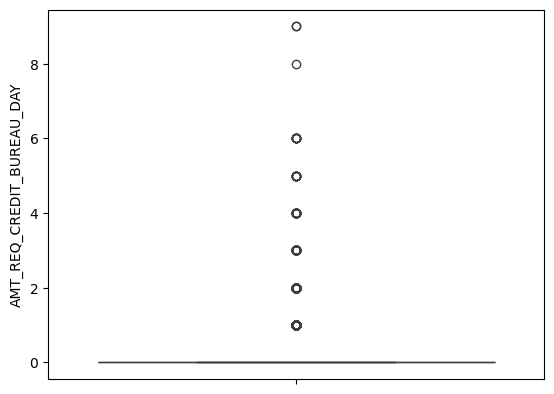

In [43]:
sns.boxplot(current_app_df['AMT_REQ_CREDIT_BUREAU_DAY'])

The boxplot is not looking clear as we can see that their are presence of outliers in the column so further assessment will be done

In [44]:
#understanding various records in the column AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

In [45]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

41519

In [46]:
#Calculating percentage of each record in the dataframe
current_app_df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: proportion, dtype: float64

In [47]:
#Checking the statistics of the column
current_app_df['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

The summary above shows there are only few records with value grwater than 0. it expplains the reason behind distorted boxplot.

For the column AMT_REQ_CREDIT_BUREAU_DAY, we can either exclude the missing value or fill in 0 to the columns since 99.4% of the rows are 0. 

The best imputation technique is to replace null with with the mode which is 0.

##### 3.1.4 To get the best inputation technique for AMT_REQ_CREDIT_BUREAU_HOUR

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_HOUR'>

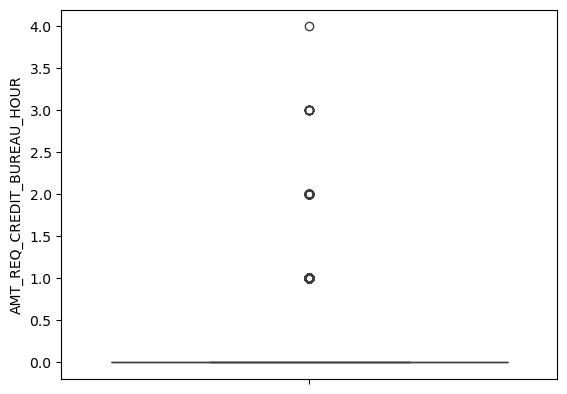

In [48]:
sns.boxplot(current_app_df['AMT_REQ_CREDIT_BUREAU_HOUR'])

The boxplot is not looking clear as we can see that their are presence of outliers in the column so further assessment will be done

In [49]:
#understanding various records in the column AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

In [50]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

41519

In [51]:
#Calculating percentage of each record in the dataframe
current_app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

In [52]:
#Checking the statistics of the column
current_app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

The summary above shows there are only few records with value grwater than 0. it expplains the reason behind distorted boxplot.

For the column AMT_REQ_CREDIT_BUREAU_HOUR, we can either exclude the missing value or fill in 0 to the columns since 99.38% of the rows are 0. 

The best imputation technique is to replace null with with the mode which is 0.

##### 3.3.5 To get the best inputation technique for AMT_REQ_CREDIT_BUREAU_QRT

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_QRT'>

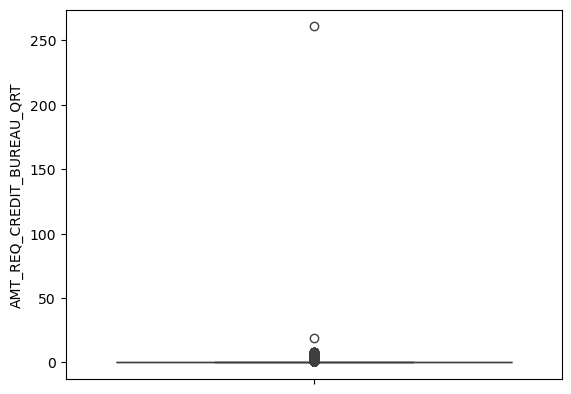

In [53]:
sns.boxplot(current_app_df['AMT_REQ_CREDIT_BUREAU_QRT'])

In [54]:
#understanding various records in the column AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

In [55]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

41519

In [56]:
#Calculating percentage of each record in the dataframe
current_app_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_QRT
0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
8.0       0.002632
7.0       0.002632
261.0     0.000376
19.0      0.000376
Name: proportion, dtype: float64

In [57]:
#Checking the statistics of the column
current_app_df['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

The summary above shows there are only few records with value grwater than 0. it expplains the reason behind distorted boxplot.

For the column AMT_REQ_CREDIT_BUREAU_QRT, we can either exclude the missing value or fill in 0 to the columns since 80.9% of the rows are 0. 

The best imputation technique is to replace null with with the mode which is 0.

##### 3.3.6 To get the best inputation technique for AMT_REQ_CREDIT_BUREAU_YEAR

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_YEAR'>

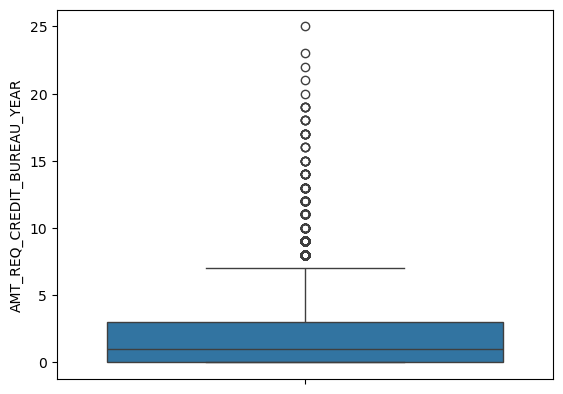

In [58]:
sns.boxplot(current_app_df['AMT_REQ_CREDIT_BUREAU_YEAR'])

In [59]:
#understanding various records in the column AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

In [60]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

41519

In [61]:
#Calculating percentage of each record in the dataframe
current_app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
19.0     0.001504
18.0     0.001504
16.0     0.001128
25.0     0.000376
23.0     0.000376
22.0     0.000376
21.0     0.000376
20.0     0.000376
Name: proportion, dtype: float64

In [62]:
#Checking the statistics of the column
current_app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In this columns we cxan observe that value 0,1,2,3 are significantly present in a good number. replacing with null values will significantly change the column statistics.

Hence, the best approach would be to remove these rows.

#### 3.4 Checking the data types of columns and fixing the incorrect data types

In [63]:
#Checking the data types of columns and fixing the incorrect data types
current_app_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


we can observe that all columns did not have incorrect data types

In [64]:
# Fixing the columns with negative data and driving the number of years for DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_LAST_PHONE_CHANGE & DAYS_ID_PUBLISH
current_app_df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = current_app_df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]
current_app_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,

### 3.5 Identify Outliers for Numerical Columns

In [65]:
# verifying the class data
current_app_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


#### For the outlier analysis of the numeriacal columns, it is best to focus on:t64

AMT_INCOME_TOTAL                
AMT_CREDIT                      
AMT_ANNUITY                     
AMT_GOODS_PRICE                 
FLOORSMAX_AVG                   

### 3.5.1 Outliers Analysis for AMT_GOODS_PRICE

<Axes: ylabel='AMT_GOODS_PRICE'>

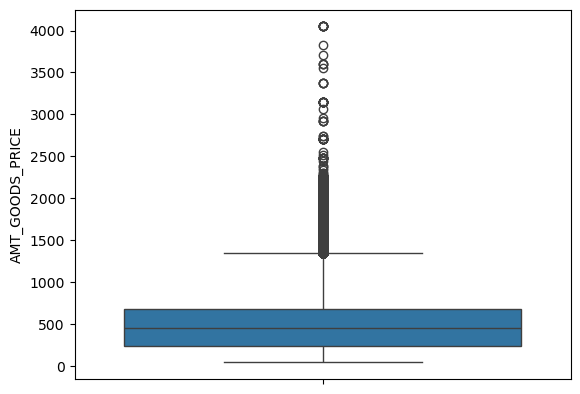

In [67]:
sns.boxplot(current_app_df['AMT_GOODS_PRICE']/1000.0)

According to the boxplot above for AMT_GOODS_PRICE we can observe that the outliers are much at the upper, the outliers are outside the lines.

In [68]:
# checking colmns statisitcs
(current_app_df['AMT_GOODS_PRICE']/1000.0).describe()

count    307233.000000
mean        538.396207
std         369.446461
min          40.500000
25%         238.500000
50%         450.000000
75%         679.500000
max        4050.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [69]:
# Maximum value for boxplot
IQR_AMT_GOODS_PRICE = (current_app_df['AMT_GOODS_PRICE']/1000.0).quantile(0.75) - (current_app_df['AMT_GOODS_PRICE']/1000.0).quantile(0.25)
upper_limit_IQR_AMT_GOODS_PRICE = (current_app_df['AMT_GOODS_PRICE']/1000.0).quantile(0.75) + IQR_AMT_GOODS_PRICE*1.5
upper_limit_IQR_AMT_GOODS_PRICE

1341.0

The formular above helps to calculate the maximum and the minimum percentile. we have 1341 as the maximum allowed value

In [71]:
#percentage of outliers in AMT_GOODS_PRICE
round(100.0 * len(current_app_df[(current_app_df['AMT_GOODS_PRICE']/1000.0)>upper_limit_IQR_AMT_GOODS_PRICE])/len(current_app_df), 2)

4.79

From the boxplot we can see that the Outliers in AMT_GOODS_PRICE with a percentage of 4.79%

### 3.5.2 Outliers Analysis for AMT_INCOME_TOTAL

<Axes: ylabel='AMT_INCOME_TOTAL'>

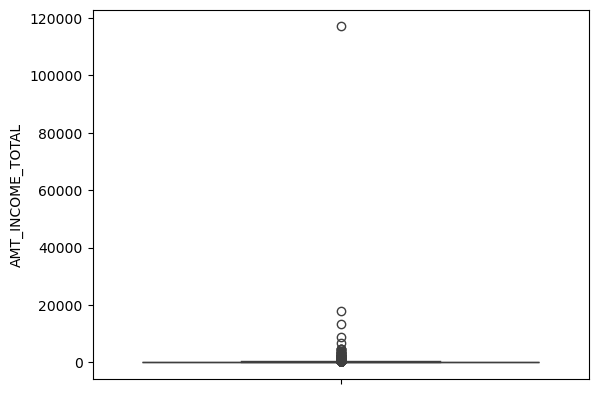

In [74]:
#dividing by 1000 for the ease of read and converting into value in ('000s')
sns.boxplot(current_app_df['AMT_INCOME_TOTAL']/1000.0)

In [73]:
# checking colmns statisitcs
(current_app_df['AMT_INCOME_TOTAL']/1000.0).describe()

count    307511.000000
mean        168.797919
std         237.123146
min          25.650000
25%         112.500000
50%         147.150000
75%         202.500000
max      117000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [75]:
# Maximum value for boxplot
IQR_AMT_INCOME_TOTAL = (current_app_df['AMT_INCOME_TOTAL']/1000.0).quantile(0.75) - (current_app_df['AMT_INCOME_TOTAL']/1000.0).quantile(0.25)
upper_limit_IQR_AMT_INCOME_TOTAL = (current_app_df['AMT_INCOME_TOTAL']/1000.0).quantile(0.75) + IQR_AMT_INCOME_TOTAL*1.5
upper_limit_IQR_AMT_INCOME_TOTAL

337.5

In [76]:
#percentage of outliers in AMT_INCOME_TOTAL
round(100.0 * len(current_app_df[(current_app_df['AMT_INCOME_TOTAL']/1000.0)>upper_limit_IQR_AMT_INCOME_TOTAL])/len(current_app_df), 2)

4.56

From the boxplot we can see that the Outliers in AMT_INCOME_TOTAL with a percentage of 4.56%

### 3.5.3 Outliers Analysis for AMT_INCOME_TOTAL

<Axes: ylabel='AMT_CREDIT'>

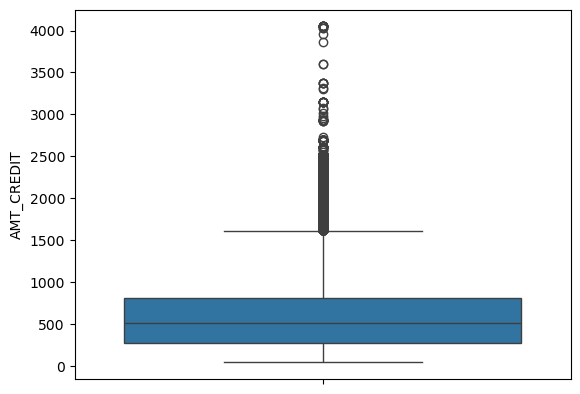

In [77]:
#dividing by 1000 for the ease of read and converting into value in ('000s')
sns.boxplot(current_app_df['AMT_CREDIT']/1000.0)

In [78]:
# checking colmns statisitcs
(current_app_df['AMT_CREDIT']/1000.0).describe()

count    307511.000000
mean        599.026000
std         402.490777
min          45.000000
25%         270.000000
50%         513.531000
75%         808.650000
max        4050.000000
Name: AMT_CREDIT, dtype: float64

In [80]:
# Maximum value for boxplot
IQR_AMT_CREDIT = (current_app_df['AMT_CREDIT']/1000.0).quantile(0.75) - (current_app_df['AMT_CREDIT']/1000.0).quantile(0.25)
upper_limit_IQR_AMT_CREDIT = (current_app_df['AMT_CREDIT']/1000.0).quantile(0.75) + IQR_AMT_CREDIT*1.5
upper_limit_IQR_AMT_CREDIT

1616.625

In [81]:
#percentage of outliers in AMT_CREDIT
round(100.0 * len(current_app_df[(current_app_df['AMT_CREDIT']/1000.0)>upper_limit_IQR_AMT_CREDIT])/len(current_app_df), 2)

2.13

### 3.5.4 Outliers Analysis for AMT_ANNUITY

<Axes: ylabel='AMT_ANNUITY'>

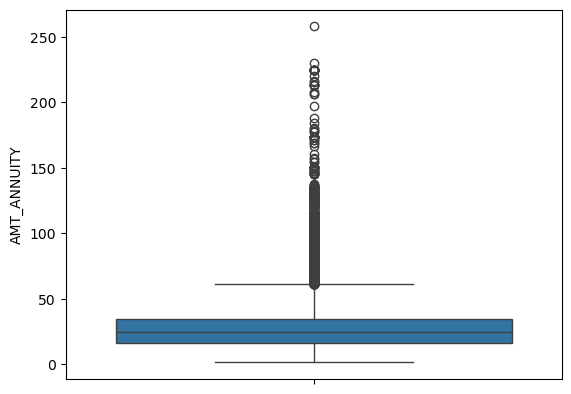

In [82]:
#dividing by 1000 for the ease of read and converting into value in ('000s')
sns.boxplot(current_app_df['AMT_ANNUITY']/1000.0)

In [83]:
# checking colmns statisitcs
(current_app_df['AMT_ANNUITY']/1000.0).describe()

count    307499.000000
mean         27.108574
std          14.493737
min           1.615500
25%          16.524000
50%          24.903000
75%          34.596000
max         258.025500
Name: AMT_ANNUITY, dtype: float64

In [86]:
# Maximum value for boxplot
IQR_AMT_ANNUITY = (current_app_df['AMT_ANNUITY']/1000.0).quantile(0.75) - (current_app_df['AMT_ANNUITY']/1000.0).quantile(0.25)
upper_limit_IQR_AMT_ANNUITY= (current_app_df['AMT_ANNUITY']/1000.0).quantile(0.75) + IQR_AMT_ANNUITY*1.5
upper_limit_IQR_AMT_ANNUITY

61.70399999999999

In [87]:
#percentage of outliers in AMT_CREDIT
round(100.0 * len(current_app_df[(current_app_df['AMT_ANNUITY']/1000.0)>upper_limit_IQR_AMT_ANNUITY])/len(current_app_df), 2)

2.44

### 3.5.4 Outliers Analysis for FLOORSMAX_AVG

<Axes: ylabel='FLOORSMAX_AVG'>

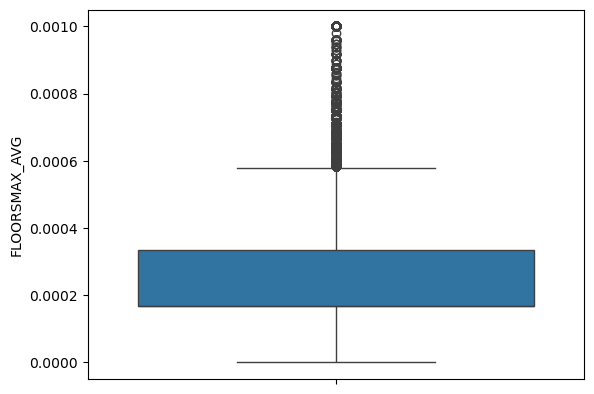

In [88]:
#dividing by 1000 for the ease of read and converting into value in ('000s')
sns.boxplot(current_app_df['FLOORSMAX_AVG']/1000.0)

In [89]:
# checking colmns statisitcs
(current_app_df['FLOORSMAX_AVG']/1000.0).describe()

count    154491.000000
mean          0.000226
std           0.000145
min           0.000000
25%           0.000167
50%           0.000167
75%           0.000333
max           0.001000
Name: FLOORSMAX_AVG, dtype: float64

In [90]:
# Maximum value for boxplot
IQR_FLOORSMAX_AVG= (current_app_df['FLOORSMAX_AVG']/1000.0).quantile(0.75) - (current_app_df['FLOORSMAX_AVG']/1000.0).quantile(0.25)
upper_limit_IQR_FLOORSMAX_AVG= (current_app_df['FLOORSMAX_AVG']/1000.0).quantile(0.75) + IQR_FLOORSMAX_AVG*1.5
upper_limit_IQR_FLOORSMAX_AVG

0.0005831999999999999

In [91]:
#percentage of outliers in AMT_CREDIT
round(100.0 * len(current_app_df[(current_app_df['FLOORSMAX_AVG']/1000.0)>upper_limit_IQR_FLOORSMAX_AVG])/len(current_app_df), 2)

1.7

From the boxplot we can see that the Outliers in FLOORSMAX_AVG with a percentage of 1.7%

### 3.6 Binning continuous variables

we will focusing on:

AGE_GROUP

AMT_CATEGORY

In [92]:
# DAYS_BIRTH column can be binned 0-10, 10-20 and so on
current_app_df['AGE_GROUP'] = pd.cut(x = current_app_df.DAYS_BIRTH, bins = [ 0, 19, 29, 39, 49, 59, 69, 79, 89], labels = ['10s','20s','30s','40s', '50s', '60s', '70s', '80s'])
current_app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
